# Monte Carlo Simulation for FE
## IEOR 4703

### (a) Find sample mean and sample variance of the given data.
### (b) Use bootstrap method to estimate MSE for both mean and variance
### (c) Find CI for both mean and variance

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

import scipy as sp
from time import time
from statsmodels.distributions.empirical_distribution import ECDF

### Load sample data

In [3]:
# Load data into NumPy array
X = np.loadtxt("dataForProblem1.dat", delimiter=",")
X = X[1:50]
N = len(X)

### Sample mean

In [4]:
theta_hat = np.mean(X)
sig2_N = np.var(X, ddof=1)
print(theta_hat)
print(sig2_N)

5.654716224285714
8.469731992134543


## Bootstrap MSE for mean and its CI

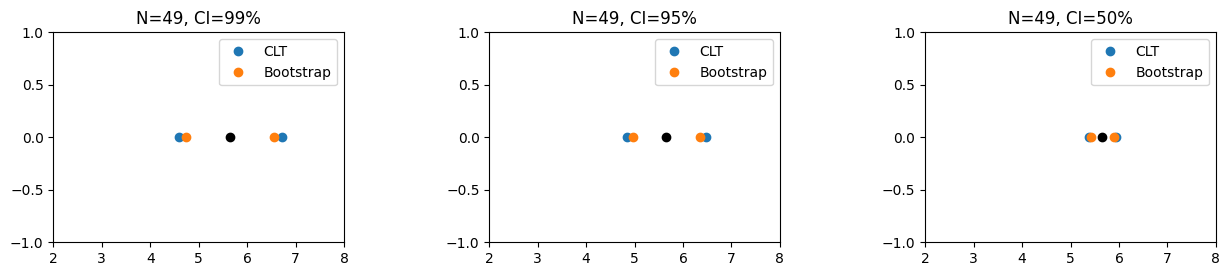

In [5]:
# axis for plots
lowerB = 2
upperB = 8
boundY = 1

# sample sizes
nN = [100, 500, 1000, 5000]
sizeN = len(nN)

# confidence levels
alpha = np.array([0.01, 0.05, 0.5])
# compute quantiles
z = sp.stats.norm.ppf(1 - alpha/2)
sizeM = len(alpha)

# number of bootstrap samples
B = 100
V_B = np.zeros(B)

lb_clt  = np.zeros([1, sizeM])
ub_clt  = np.zeros([1, sizeM])
lb_boot = np.zeros([1, sizeM])
ub_boot = np.zeros([1, sizeM])

theta_hat = np.mean(X)
sig2_N = np.var(X, ddof=1)

# bootstrap
for b in range(B):
    X_b = np.random.choice(X, len(X), replace=True)
    theta_b = np.mean(X_b)
    V_B[b] = (theta_b - theta_hat)**2
mse_F = np.mean(V_B)


# clt confidence intervals
lb_clt = theta_hat - z * np.sqrt(sig2_N / N)
ub_clt = theta_hat + z * np.sqrt(sig2_N / N)

# bootstrap confidence intervals
lb_boot = theta_hat - z * np.sqrt(mse_F)
ub_boot = theta_hat + z * np.sqrt(mse_F)

fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace = .5, wspace = .5)
for j in range(sizeM):
    plt.subplot(sizeN, sizeM, sizeM + j + 1)
    plt.plot([lb_clt[j], ub_clt[j]], [0,0], 'o')
    plt.plot([lb_boot[j], ub_boot[j]], [0,0], 'o')
    plt.plot(theta_hat, 0, 'o', color='black')
    plt.title('N=%i, CI=%2.0f%s' % (N, 100*(1-alpha[j]), '%'))
    plt.xlim([lowerB, upperB])
    plt.ylim([-boundY, boundY])
    plt.legend(['CLT','Bootstrap'])
plt.show()


### Bootstrap MSE for variance and its CI

MSE for Variance 2.7802
[4.22003533 4.95275838 6.95340267]
[12.35620818 11.41798466  9.22064472]


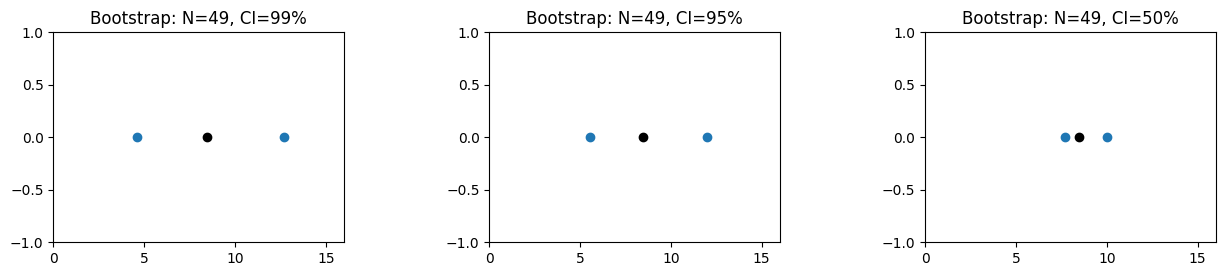

In [6]:
# axis for plots
lowerB = 0
upperB = 16
boundY = 1

# confidence levels
alpha = np.array([0.01, 0.05, 0.5])
# compute quantiles
sizeM = len(alpha)

# number of bootstrap samples
B = 2000
theta_b = np.zeros(B)
V_B = np.zeros(B)

lb_boot = np.zeros([1, sizeM])
ub_boot = np.zeros([1, sizeM])

sig2_N = np.var(X, ddof=1)

# bootstrap
for b in range(B):
    X_b = np.random.choice(X, len(X), replace=True)
    theta_b[b] = np.var(X_b)
    V_B[b] = (theta_b[b] - sig2_N)**2
mse_F_var = np.mean(V_B)

print('MSE for Variance %2.4f' %mse_F_var)

# Compute Confidence Interval
lower_b = np.percentile(theta_b, 100 * (alpha/2))
upper_b = np.percentile(theta_b, 100 * (1 - alpha/2))

print(lower_b)
print(upper_b)

fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace = .5, wspace = .5)
for j in range(sizeM):
    plt.subplot(sizeN, sizeM, sizeM + j + 1)
    # following the lecture notes
    plt.plot([2*sig2_N-upper_b[j], 2*sig2_N-lower_b[j]], [0,0], 'o')
    plt.plot(sig2_N, 0, 'o', color='black')
    plt.title('Bootstrap: N=%i, CI=%2.0f%s' % (N, 100*(1-alpha[j]), '%'))
    plt.xlim([lowerB, upperB])
    plt.ylim([-boundY, boundY])
plt.show()